In [79]:
import pandas as pd
import missingno as msno

In [80]:
mi=pd.read_csv('Myocardial infarction complications Database.csv')

In [81]:
drop_columns = ['ID',
               'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_R_1_n', 'NA_R_2_n',
               'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n',
               'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK',
               'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN']

mi = mi.drop(columns=drop_columns)

In [82]:
mi = mi.replace({'LET_IS': [i for i in range(1, 8)]}, 1)
mi['LET_IS'].value_counts()

0    1429
1     271
Name: LET_IS, dtype: int64

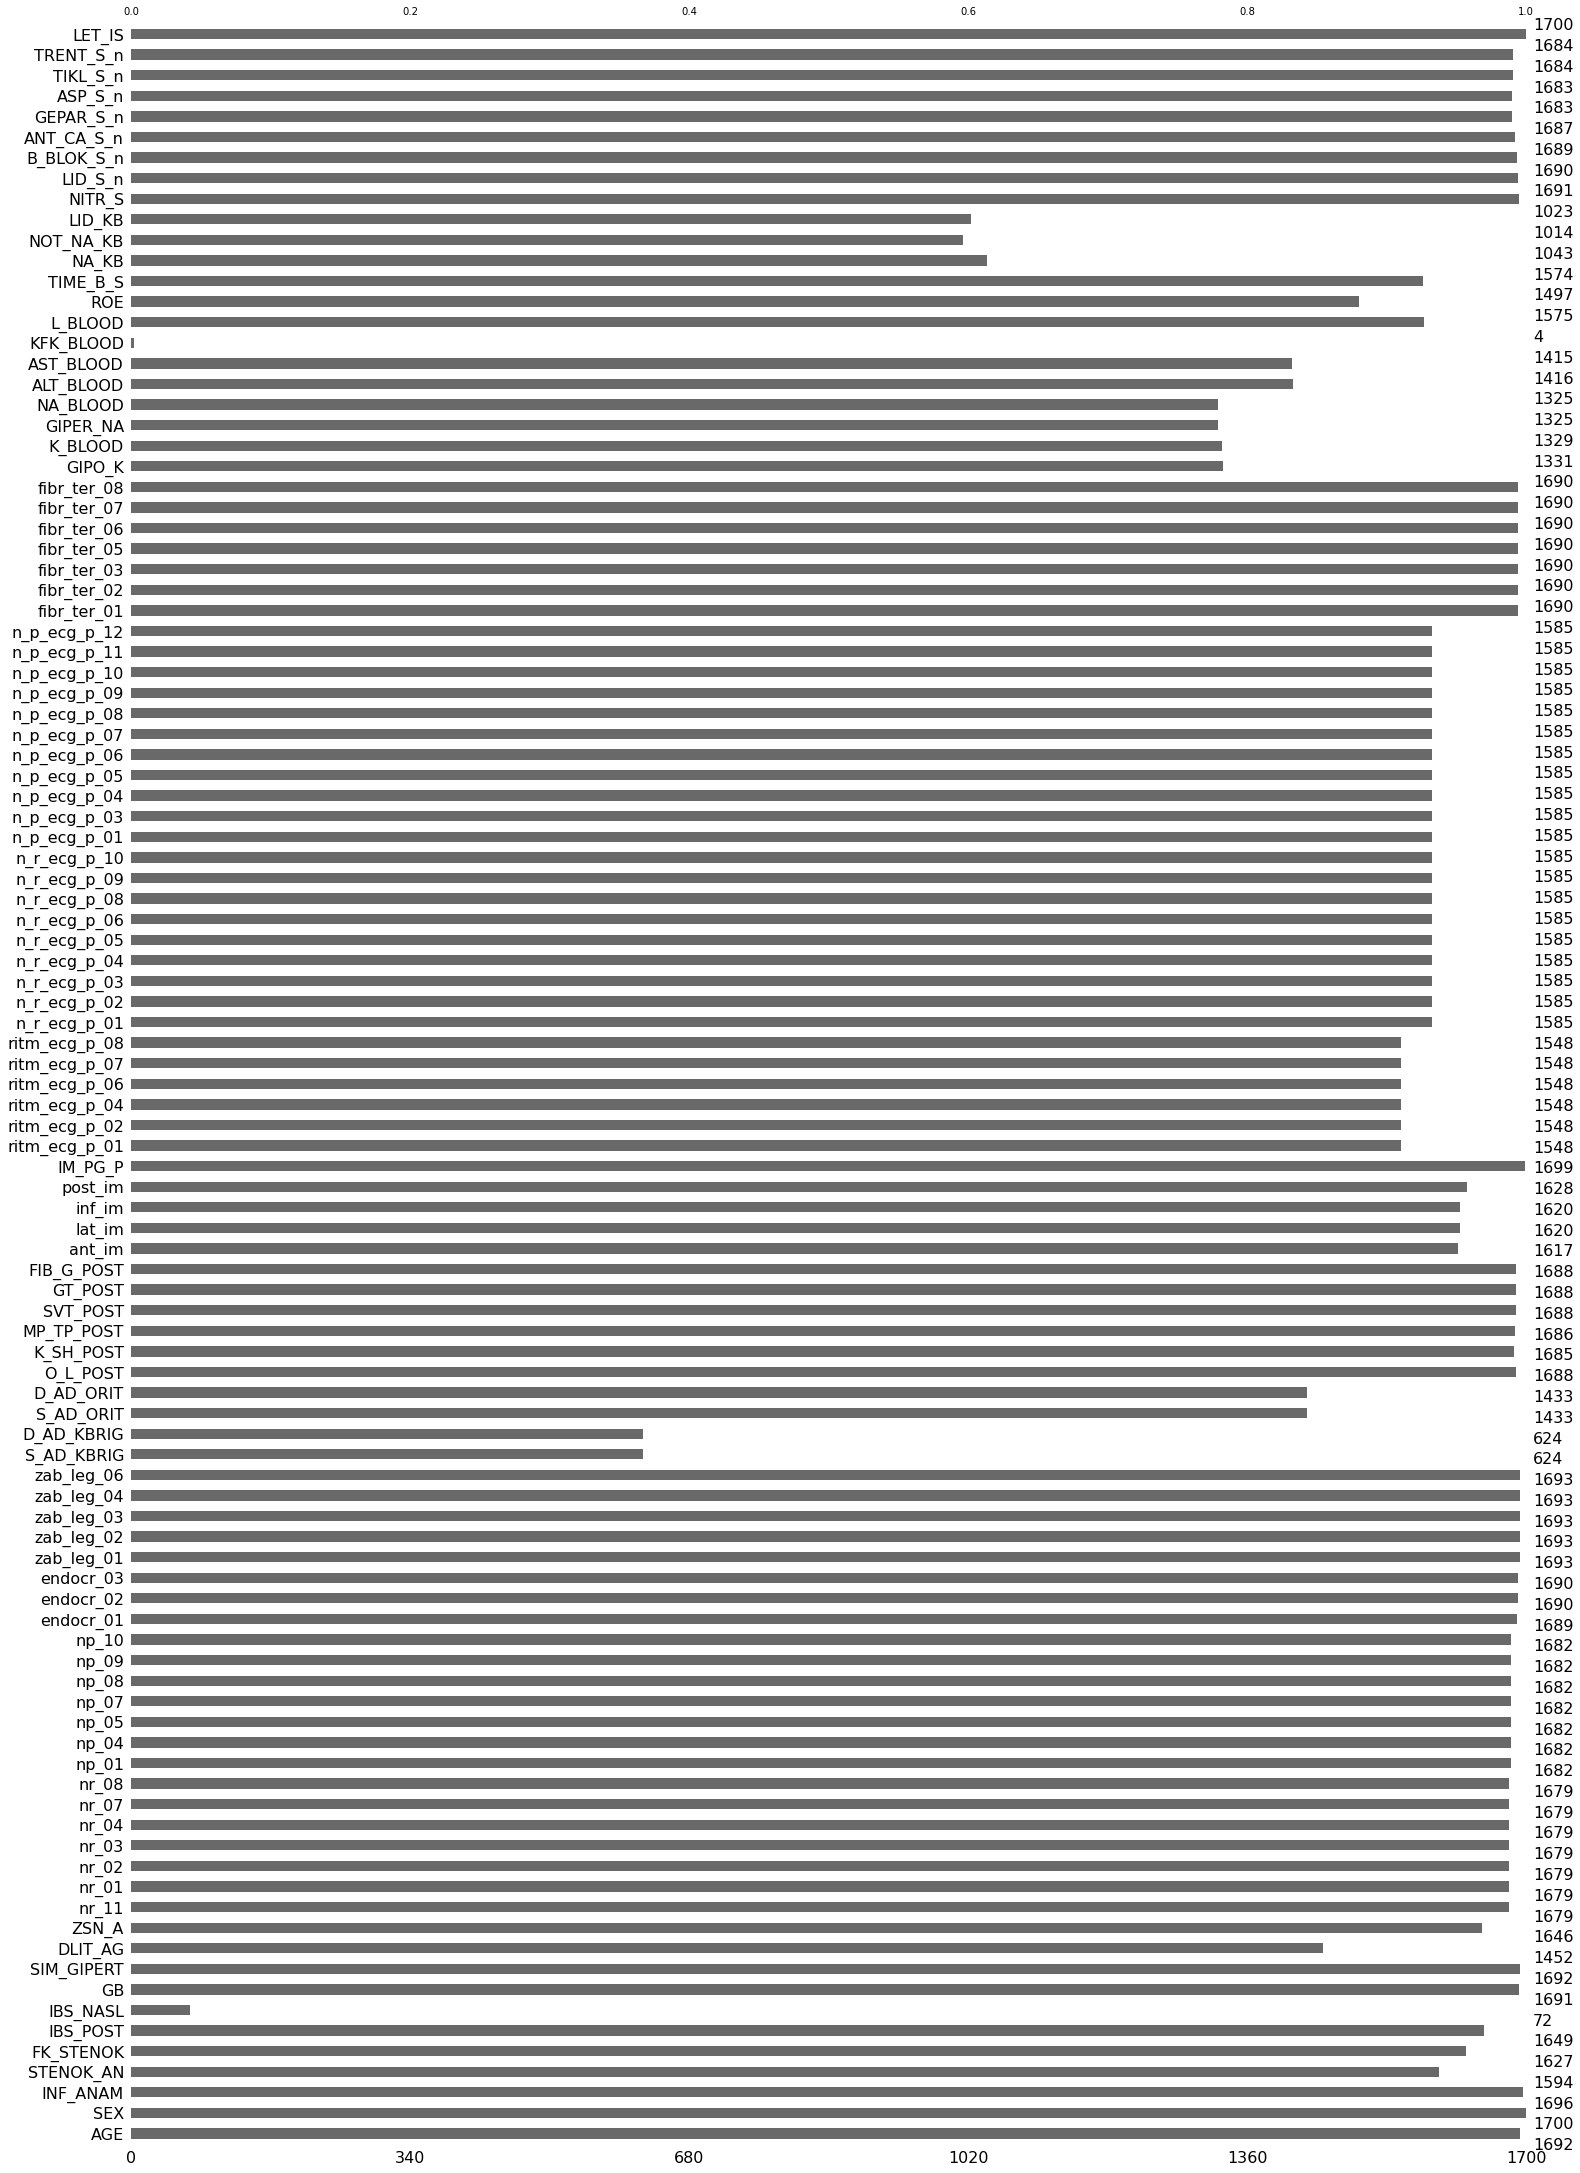

In [83]:
#Missingno is a library that allows for easy visuals of missing data. 
msno.bar(mi)

In [84]:
# As can be seen above there are several features that have missing data for over 75% of over the 1700 observations.
# We have decided that this is a good cutoff point for this dataset to eliminate these features.

In [85]:
drop_columns = ['IBS_NASL','D_AD_KBRIG','S_AD_KBRIG','LID_KB','NOT_NA_KB','NA_KB','KFK_BLOOD' ]

mi = mi.drop(columns=drop_columns)

In [86]:
#Now we need to organize are feauture by type
#First Binary
binary=[]
test={float(0),float(1)}
for i in mi.columns:
    if set(mi[i].dropna().unique())==test:
        binary.append(i)

In [87]:
#Continuous
continuous=[]
for i in mi.columns:
    if len(list(mi[i].dropna().unique()))>10:
        continuous.append(i)

In [88]:
continuous

['AGE',
 'S_AD_ORIT',
 'D_AD_ORIT',
 'K_BLOOD',
 'NA_BLOOD',
 'ALT_BLOOD',
 'AST_BLOOD',
 'L_BLOOD',
 'ROE']

In [89]:
len(continuous)

9

In [90]:
#Categorical/Ordinal
cato=[]
for i in mi.columns:
    if i not in binary and i not in continuous:
        cato.append(i)

In [91]:
cato

['INF_ANAM',
 'STENOK_AN',
 'FK_STENOK',
 'IBS_POST',
 'GB',
 'DLIT_AG',
 'ZSN_A',
 'ant_im',
 'lat_im',
 'inf_im',
 'post_im',
 'TIME_B_S']

In [92]:
len(cato)

12

In [93]:
len(binary)

75

In [95]:
#We need to check how balenced the binary feature are. But I am not sure what the thresehold should be.
binary_unbalaced=[]
for i in binary:
    test=mi[i].value_counts()[0]/len(mi[i])
    if test < 0.3 or test > 0.7:
        binary_unbalaced.append(i)

In [96]:
len(binary_unbalaced)

71

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f971fd00ac0>,
      dtype=object)

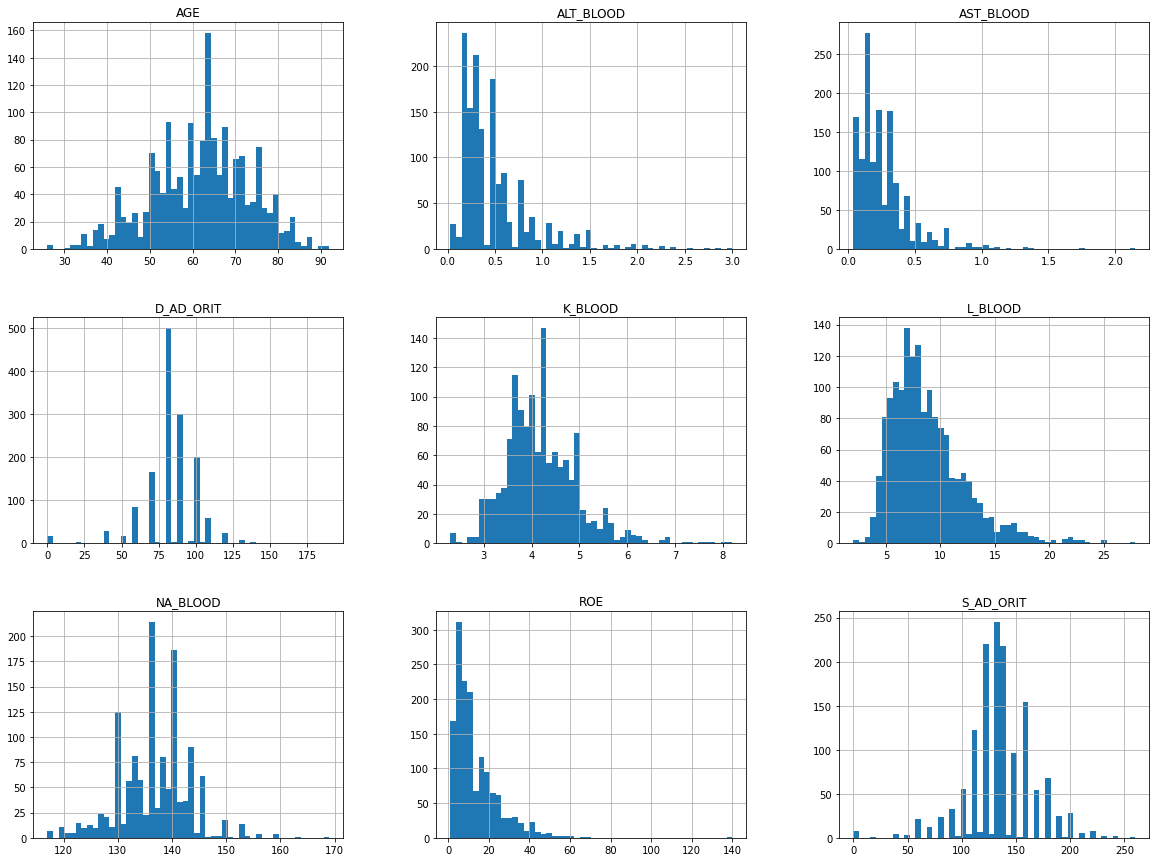

In [99]:
mi[continuous].hist(bins=50, figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9720c567c0>,
      dtype=object)

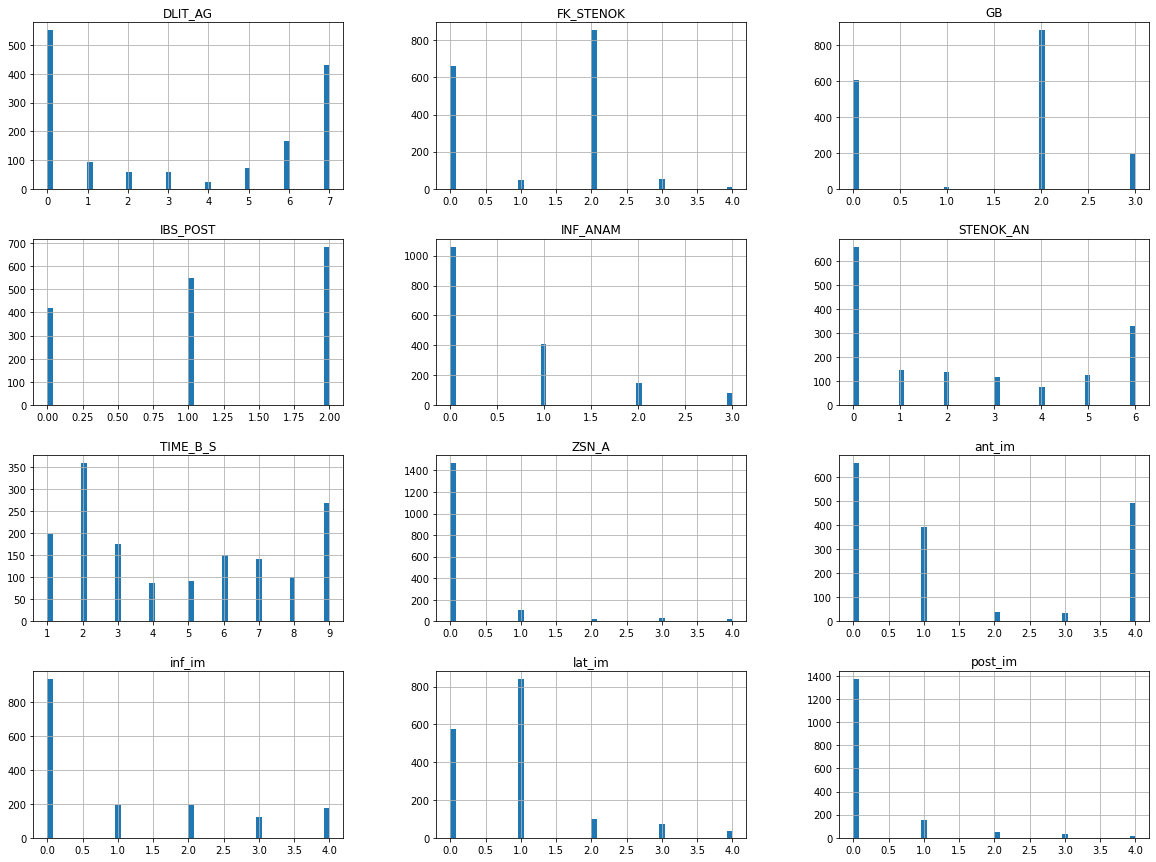

In [98]:
mi[cato].hist(bins=50, figsize=(20,15))